# LIBRARIES

In [1]:
#run only once, 
!pip install ghhops-server flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 4.4 MB/s 
  Created wheel for rhino3dm: filename=rhino3dm-7.14.2-cp37-cp37m-linux_x86_64.whl size=4995197 sha256=f70c3f4b0d380b590ab8c79995b06f1c32215fb3f040c7824a16f10ec7fd350d
  Stored in directory: /root/.cache/pip/wheels/54/fd/27/c1c91b5631a9dcb2291a8541117b0040fe461756f9c77430fc
Successfully built rhino3dm


In [2]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
from flask import Flask
from flask_ngrok import run_with_ngrok
import ghhops_server as hs
import numpy
import rhino3dm


sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# LOAD/SCALING

In [12]:
# Load data file
data = pd.read_csv('/content/gdrive/MyDrive/0.Thesis/binnedData_BA.csv')
pd.options.display.max_columns = None

data.head()

,myIndex,roomNumber,FloorHeight,Width,Length,Rotation,SouthContextOffset,EastContextOffset,NorthContextOffset,WestContextOffset,SouthContextHeight,EastContextHeight,NorthContextHeight,WestContextHeight,SouthShadingDepth,EastShadingDepth,NorthShadingDepth,WestShadingDepth,NorthGlazingRatio,WestGlazingRatio,SouthGlazingRatio,EastGlazingRatio,NorthWindowHeight,WestWindowHeight,SouthWindowHeight,EastWindowHeight,NorthWindowSill,WestWindowSill,SouthWindowSill,EastWindowSill,sDA,UDI,ASE,sDABin,UDIBin,ASEBin,sDA_Category,UDI_Category,ASE_Category
0,0,0.0,4.0,5.666667,27.333333,-41.0,39.0,41.0,23.0,73.0,2.0,116.0,67.0,106.0,0.84,0.5,0.03,0.27,0.7,0.8,0.0,0.0,8.0,7.0,2.0,10.0,3.0,2.0,2.0,2.0,100.00,46.752525,78.62,"(91.47, 100.0]","(40.288, 64.719]","(41.09, 100.0]",4,2,4
1,1,0.0,4.0,5.666667,27.333333,-41.0,39.0,41.0,23.0,73.0,2.0,116.0,67.0,106.0,0.84,0.5,0.03,0.27,0.0,0.8,0.0,0.0,8.0,7.0,2.0,10.0,3.0,2.0,2.0,2.0,100.00,62.612795,49.66,"(91.47, 100.0]","(40.288, 64.719]","(41.09, 100.0]",4,2,4
2,2,0.0,4.0,5.666667,27.333333,-41.0,39.0,41.0,23.0,73.0,2.0,116.0,67.0,106.0,0.84,0.5,0.03,0.27,0.0,0.8,0.6,0.0,8.0,7.0,2.0,10.0,3.0,2.0,2.0,2.0,100.00,49.333333,50.84,"(91.47, 100.0]","(40.288, 64.719]","(41.09, 100.0]",4,2,4
3,3,0.0,4.0,5.666667,27.333333,-41.0,39.0,41.0,23.0,73.0,2.0,116.0,67.0,106.0,0.84,0.5,0.03,0.27,0.7,0.0,0.0,0.0,8.0,7.0,2.0,10.0,3.0,2.0,2.0,2.0,24.58,29.116162,13.30,"(16.03, 52.94]","(-0.001, 40.288]","(3.74, 16.56]",2,1,2
4,5,0.0,4.0,5.666667,27.333333,-41.0,39.0,41.0,23.0,73.0,2.0,116.0,67.0,106.0,0.84,0.5,0.03,0.27,0.0,0.0,0.6,0.0,8.0,7.0,2.0,10.0,3.0,2.0,2.0,2.0,29.46,40.277778,0.00,"(16.03, 52.94]","(-0.001, 40.288]","(-0.001, 3.74]",2,1,1


In [13]:
#declare features (ROBOTIC PARAMETERS)
x = data.iloc[:,2:-9]

# Load and instantiate a StandardScalar 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to the inputs
X_scaled = scalerX.fit_transform(x)

print(X_scaled.shape)

x.head()

(14184, 28)


,FloorHeight,Width,Length,Rotation,SouthContextOffset,EastContextOffset,NorthContextOffset,WestContextOffset,SouthContextHeight,EastContextHeight,NorthContextHeight,WestContextHeight,SouthShadingDepth,EastShadingDepth,NorthShadingDepth,WestShadingDepth,NorthGlazingRatio,WestGlazingRatio,SouthGlazingRatio,EastGlazingRatio,NorthWindowHeight,WestWindowHeight,SouthWindowHeight,EastWindowHeight,NorthWindowSill,WestWindowSill,SouthWindowSill,EastWindowSill
0,4.0,5.666667,27.333333,-41.0,39.0,41.0,23.0,73.0,2.0,116.0,67.0,106.0,0.84,0.5,0.03,0.27,0.7,0.8,0.0,0.0,8.0,7.0,2.0,10.0,3.0,2.0,2.0,2.0
1,4.0,5.666667,27.333333,-41.0,39.0,41.0,23.0,73.0,2.0,116.0,67.0,106.0,0.84,0.5,0.03,0.27,0.0,0.8,0.0,0.0,8.0,7.0,2.0,10.0,3.0,2.0,2.0,2.0
2,4.0,5.666667,27.333333,-41.0,39.0,41.0,23.0,73.0,2.0,116.0,67.0,106.0,0.84,0.5,0.03,0.27,0.0,0.8,0.6,0.0,8.0,7.0,2.0,10.0,3.0,2.0,2.0,2.0
3,4.0,5.666667,27.333333,-41.0,39.0,41.0,23.0,73.0,2.0,116.0,67.0,106.0,0.84,0.5,0.03,0.27,0.7,0.0,0.0,0.0,8.0,7.0,2.0,10.0,3.0,2.0,2.0,2.0
4,4.0,5.666667,27.333333,-41.0,39.0,41.0,23.0,73.0,2.0,116.0,67.0,106.0,0.84,0.5,0.03,0.27,0.0,0.0,0.6,0.0,8.0,7.0,2.0,10.0,3.0,2.0,2.0,2.0


In [14]:
#declare regression target - (VESSEL POINTS)

y = data.iloc[:,-9:-6]

# Load and instantiate a StandardScalar 
from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()

# Apply the scaler to the outputs
y_scaled = scalerY.fit_transform(y)

print(y_scaled.shape)

y.head()

(14184, 3)


,sDA,UDI,ASE
0,100.00,46.752525,78.62
1,100.00,62.612795,49.66
2,100.00,49.333333,50.84
3,24.58,29.116162,13.30
4,29.46,40.277778,0.00


# TRAINING

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 20)

In [16]:
# Instantiate a sequential model
tf.random.set_seed(5)
modelANN = tf.keras.Model()
modelANN = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]  

# Add 3 dense layers of 64 and 32, 16 neurons each
modelANN.add(tf.keras.layers.Dense(64, input_shape=(n_cols,), activation='relu'))
modelANN.add(tf.keras.layers.Dense(32, input_shape=(n_cols,), activation='relu'))
modelANN.add(tf.keras.layers.Dense(16, activation='relu'))
  
# Add a dense layer with 3 value output
modelANN.add(tf.keras.layers.Dense(3, activation= "sigmoid"))
  
# Compile your model 
modelANN.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy"])

In [17]:
modelANN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1856      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 3)                 51        
                                                                 
Total params: 4,515
Trainable params: 4,515
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = modelANN.fit(X_train,y_train, epochs=200, validation_split=0.2)

Epoch 1/200
284/284 [==============================] - 1s 3ms/step - loss: 0.0524 - accuracy: 0.7933 - val_loss: 0.0228 - val_accuracy: 0.8749
Epoch 2/200
284/284 [==============================] - 1s 2ms/step - loss: 0.0174 - accuracy: 0.8874 - val_loss: 0.0150 - val_accuracy: 0.8956
Epoch 3/200
284/284 [==============================] - 1s 2ms/step - loss: 0.0120 - accuracy: 0.9054 - val_loss: 0.0114 - val_accuracy: 0.9031
Epoch 4/200
284/284 [==============================] - 1s 2ms/step - loss: 0.0094 - accuracy: 0.9124 - val_loss: 0.0092 - val_accuracy: 0.9097
Epoch 5/200
284/284 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.9148 - val_loss: 0.0081 - val_accuracy: 0.9181
Epoch 6/200
284/284 [==============================] - 1s 2ms/step - loss: 0.0071 - accuracy: 0.9184 - val_loss: 0.0075 - val_accuracy: 0.9137
Epoch 7/200
284/284 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 0.9223 - val_loss: 0.0068 - val_accuracy: 0.9282

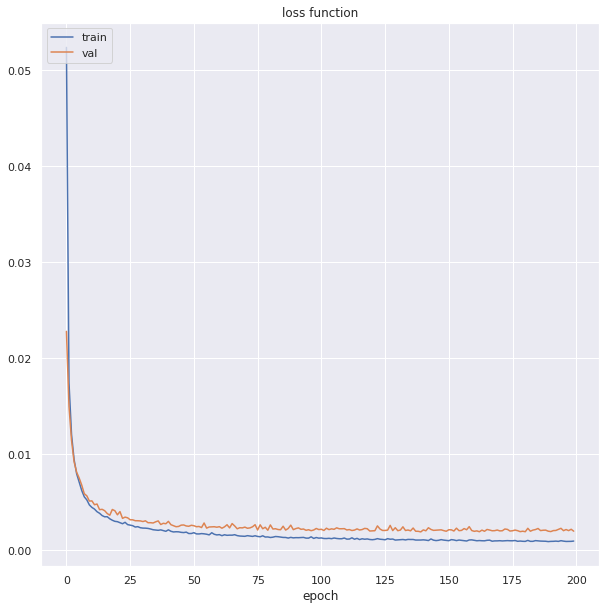

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Training (Hesham's model)

In [ ]:
###Hesham's sequential model - use one or the other ####

import tensorflow as tf

# Instantiate a sequential model
modelANN = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]  

# model architecture
modelANN.add(tf.keras.layers.Dense(10, input_shape=(n_cols,), activation='sigmoid'))# INPUT LAYER

modelANN.add(tf.keras.layers.Dense(18, activation='relu'))
modelANN.add(tf.keras.layers.Dense(52, activation='relu'))
modelANN.add(tf.keras.layers.Dense(27, activation='relu'))
modelANN.add(tf.keras.layers.Dense(18, activation='relu'))


 
# Add a dense layer with 1 value output
modelANN.add(tf.keras.layers.Dense(3, activation= "sigmoid")) # OUTPUT LAYER
  
# Compile the model model 
modelANN.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy"])

modelANN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                290       
                                                                 
 dense_5 (Dense)             (None, 18)                198       
                                                                 
 dense_6 (Dense)             (None, 52)                988       
                                                                 
 dense_7 (Dense)             (None, 27)                1431      
                                                                 
 dense_8 (Dense)             (None, 18)                504       
                                                                 
 dense_9 (Dense)             (None, 3)                 57        
                                                                 
Total params: 3,468
Trainable params: 3,468
Non-traina

# MODEL SAVING

In [ ]:
#https://www.tensorflow.org/guide/keras/save_and_serialize
modelANN.save("ANNModel.h5")

scalerX_filename = "scalerX_save"
joblib.dump(scalerX, scalerX_filename)

scalerY_filename = "scalerY_save"
joblib.dump(scalerY, scalerY_filename)

['scalerY_save']

# HOPS

In [ ]:
y.head()

,sDA,UDI,ASE
0,40.80,79.145797,5.82
1,22.73,39.574263,4.76
2,100.00,47.284580,57.77
3,0.00,47.657260,0.00
4,100.00,63.463152,42.63


In [ ]:
# 1 --- import model

path = "/content/ANNModel.h5"
model = tf.keras.models.load_model(path)
model = modelANN
# 2 --- set up scaler variables

scalerX = joblib.load("/content/scalerX_save")
scalerY = joblib.load("/content/scalerY_save")


def myMLPredictions(FloorHeight, Width, Length, Rotation, SouthContextOffset, EastContextOffset, NorthContextOffset, WestContextOffset, SouthContextHeight, EastContextHeight, NorthContextHeight, 
                          WestContextHeight, SouthShadingDepth, EastShadingDepth, NorthShadingDepth, WestShadingDepth, NorthGlazingRatio, WestGlazingRatio, SouthGlazingRatio, EastGlazingRatio, 
                          NorthWindowHeight, WestWindowHeight, SouthWindowHeight, EastWindowHeight, NorthWindowSill, WestWindowSill, SouthWindowSill, EastWindowSill):

    # Create Input Array
    new_data = pd.DataFrame([[FloorHeight, Width, Length, Rotation, SouthContextOffset, EastContextOffset, NorthContextOffset, WestContextOffset, SouthContextHeight, EastContextHeight, NorthContextHeight, 
                          WestContextHeight, SouthShadingDepth, EastShadingDepth, NorthShadingDepth, WestShadingDepth, NorthGlazingRatio, WestGlazingRatio, SouthGlazingRatio, EastGlazingRatio, 
                          NorthWindowHeight, WestWindowHeight, SouthWindowHeight, EastWindowHeight, NorthWindowSill, WestWindowSill, SouthWindowSill, EastWindowSill]])

    # Scale Input to match the same format from the trained model
    scaled_input = scalerX.transform(new_data)

    # Generate Predictions from Scaled Input using model.predict
    #https://www.tensorflow.org/api_docs/python/tf/keras/Model

    # 01// predict
    out = model.predict(scaled_input)
    #02 // inverse scaling
    predictions = scalerY.inverse_transform(out)

    
    #Flatten predictions list to be readable for hops
    pred_list = predictions.tolist()
    flat_list = []

    for i in pred_list:
        flat_list += i
    

    # Set each prediction value to a variable
    sDA= flat_list[0]
    UDI= flat_list[1]
    ASE= flat_list[2]

    return sDA, UDI, ASE


In [ ]:
x.head()

,FloorHeight,Width,Length,Rotation,SouthContextOffset,EastContextOffset,NorthContextOffset,WestContextOffset,SouthContextHeight,EastContextHeight,NorthContextHeight,WestContextHeight,SouthShadingDepth,EastShadingDepth,NorthShadingDepth,WestShadingDepth,NorthGlazingRatio,WestGlazingRatio,SouthGlazingRatio,EastGlazingRatio,NorthWindowHeight,WestWindowHeight,SouthWindowHeight,EastWindowHeight,NorthWindowSill,WestWindowSill,SouthWindowSill,EastWindowSill,Location
0,8.0,31.666667,14.0,-22.0,69,12,11,71,161,125,472,142,1.96,1.4,1.93,2.11,0.2,0.3,0.0,0.0,0,4,6,8,5,1,0,2,1
1,8.0,31.666667,14.0,-22.0,69,12,11,71,161,125,472,142,1.96,1.4,1.93,2.11,0.0,0.3,0.0,0.0,0,4,6,8,5,1,0,2,1
2,8.0,31.666667,14.0,-22.0,69,12,11,71,161,125,472,142,1.96,1.4,1.93,2.11,0.0,0.3,0.7,0.0,0,4,6,8,5,1,0,2,1
3,8.0,31.666667,14.0,-22.0,69,12,11,71,161,125,472,142,1.96,1.4,1.93,2.11,0.2,0.0,0.0,0.0,0,4,6,8,5,1,0,2,1
4,8.0,31.666667,14.0,-22.0,69,12,11,71,161,125,472,142,1.96,1.4,1.93,2.11,0.0,0.0,0.7,0.0,0,4,6,8,5,1,0,2,1


In [ ]:
app = Flask(__name__)
#using ngrok library to stream data
run_with_ngrok(app) 
hops = hs.Hops(app)

# -- ATOB MODEL

@hops.component(
    "/hello3",
    name="Daylight Predictor",
    description="Daylight Predictor with machine learning",
    inputs=[
        hs.HopsNumber("FloorHeight", "H", "Floor Height"),
        hs.HopsNumber("Width", "W", "Width"),
        hs.HopsNumber("Length", "L", "Length"),
        hs.HopsNumber("Rotation", "R", "Building Rotation"),
        hs.HopsNumber("SouthContextOffset", "SCO", "South Context Offset"),
        hs.HopsNumber("EastContextOffset", "ECO", "East Context Offset"),
        hs.HopsNumber("NorthContextOffset", "NCO", "North Context Offset"),
        hs.HopsNumber("WestContextOffset", "WCO", "West Context Offset"),
        hs.HopsNumber("SouthContextHeight", "SCH", "South Context Height"),
        hs.HopsNumber("EastContextHeight", "ECH", "East Context Height"),
        hs.HopsNumber("NorthContextHeight", "NCH", "North Context Height"),
        hs.HopsNumber("WestContextHeight", "WCH", "WestContextHeight"),
        hs.HopsNumber("SouthShadingDepth", "SSD", "South Shading Depth"),
        hs.HopsNumber("EastShadingDepth", "ESD", "East Shading Depth"),
        hs.HopsNumber("NorthShadingDepth", "NSD", "North Shading Depth"),
        hs.HopsNumber("WestShadingDepth", "WSD", "West Shading Depth"),
        hs.HopsNumber("NorthGlazingRatio", "NGR", "North Glazing Ratio"),
        hs.HopsNumber("WestGlazingRatio", "WGR", "West Glazing Ratio"),
        hs.HopsNumber("SouthGlazingRatio", "SGR", "South Glazing Ratio"),
        hs.HopsNumber("EastGlazingRatio", "EGR", "East Glazing Ratio"),
        hs.HopsNumber("NorthWindowHeight", "NWH", "North Window Height"),
        hs.HopsNumber("WestWindowHeight", "WWH", "West Window Height"),
        hs.HopsNumber("SouthWindowHeight", "SWH", "South Window Height"),
        hs.HopsNumber("EastWindowHeight", "EWH", "East Window Height"),
        hs.HopsNumber("NorthWindowSill", "NWS", "North Window Sill"),
        hs.HopsNumber("WestWindowSill", "WWS", "West Window Sill"),
        hs.HopsNumber("SouthWindowSill", "SWS", "South Window Sill"),
        hs.HopsNumber("EastWindowSill", "EWS", "East Window Sill")
    ],
    outputs=[
        hs.HopsNumber("sDA", "sDA", "Spatial Daylight Autonomy"),
        hs.HopsNumber("UDI", "UDI", "Useful Daylight Illuminance"),
        hs.HopsNumber("ASE", "ASE", "Annual Sun Exposure")
    ]
)

def myMLFunction(FloorHeight, Width, Length, Rotation, SouthContextOffset, EastContextOffset, NorthContextOffset, WestContextOffset, SouthContextHeight, EastContextHeight, NorthContextHeight, 
                          WestContextHeight, SouthShadingDepth, EastShadingDepth, NorthShadingDepth, WestShadingDepth, NorthGlazingRatio, WestGlazingRatio, SouthGlazingRatio, EastGlazingRatio, 
                          NorthWindowHeight, WestWindowHeight, SouthWindowHeight, EastWindowHeight, NorthWindowSill, WestWindowSill, SouthWindowSill, EastWindowSill):
    return myMLPredictions(FloorHeight, Width, Length, Rotation, SouthContextOffset, EastContextOffset, NorthContextOffset, WestContextOffset, SouthContextHeight, EastContextHeight, NorthContextHeight, 
                          WestContextHeight, SouthShadingDepth, EastShadingDepth, NorthShadingDepth, WestShadingDepth, NorthGlazingRatio, WestGlazingRatio, SouthGlazingRatio, EastGlazingRatio, 
                          NorthWindowHeight, WestWindowHeight, SouthWindowHeight, EastWindowHeight, NorthWindowSill, WestWindowSill, SouthWindowSill, EastWindowSill)


In [ ]:
#run the app
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://7fad-34-125-238-235.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [08/Sep/2022 20:42:47] "GET /hello3 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [08/Sep/2022 20:42:48] "GET /hello3 HTTP/1.1" 200 -
INFO:Hops:Solving using legacy API: <HopsComponent /hello3 [FloorHeight,Width,Length,Rotation,SouthContextOffset,EastContextOffset,NorthContextOffset,WestContextOffset,SouthContextHeight,EastContextHeight,NorthContextHeight,WestContextHeight,SouthShadingDepth,EastShadingDepth,NorthShadingDepth,WestShadingDepth,NorthGlazingRatio,WestGlazingRatio,SouthGlazingRatio,EastGlazingRatio,NorthWindowHeight,WestWindowHeight,SouthWindowHeight,EastWindowHeight,NorthWindowSill,WestWindowSill,SouthWindowSill,EastWindowSill,Location -> Daylight Predictor -> sDA,UDI,ASE] >
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
INFO:werkzeug:127.0.0.1 - - [08/Sep/2022 20:42:53] "POST /solve HTTP/1.1"